In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import seaborn as sns
uploaded = files.upload()
dataset = pd.read_csv("diabetes.csv") #cargar el dataset

Saving diabetes.csv to diabetes.csv


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset["Outcome"].value_counts().to_frame()#Obtener el numero de datos por cada clase
#Se observa que los datos no estan balanceados y ahi mayor numero de registros de clase 0

,count
Outcome,
0,500
1,268


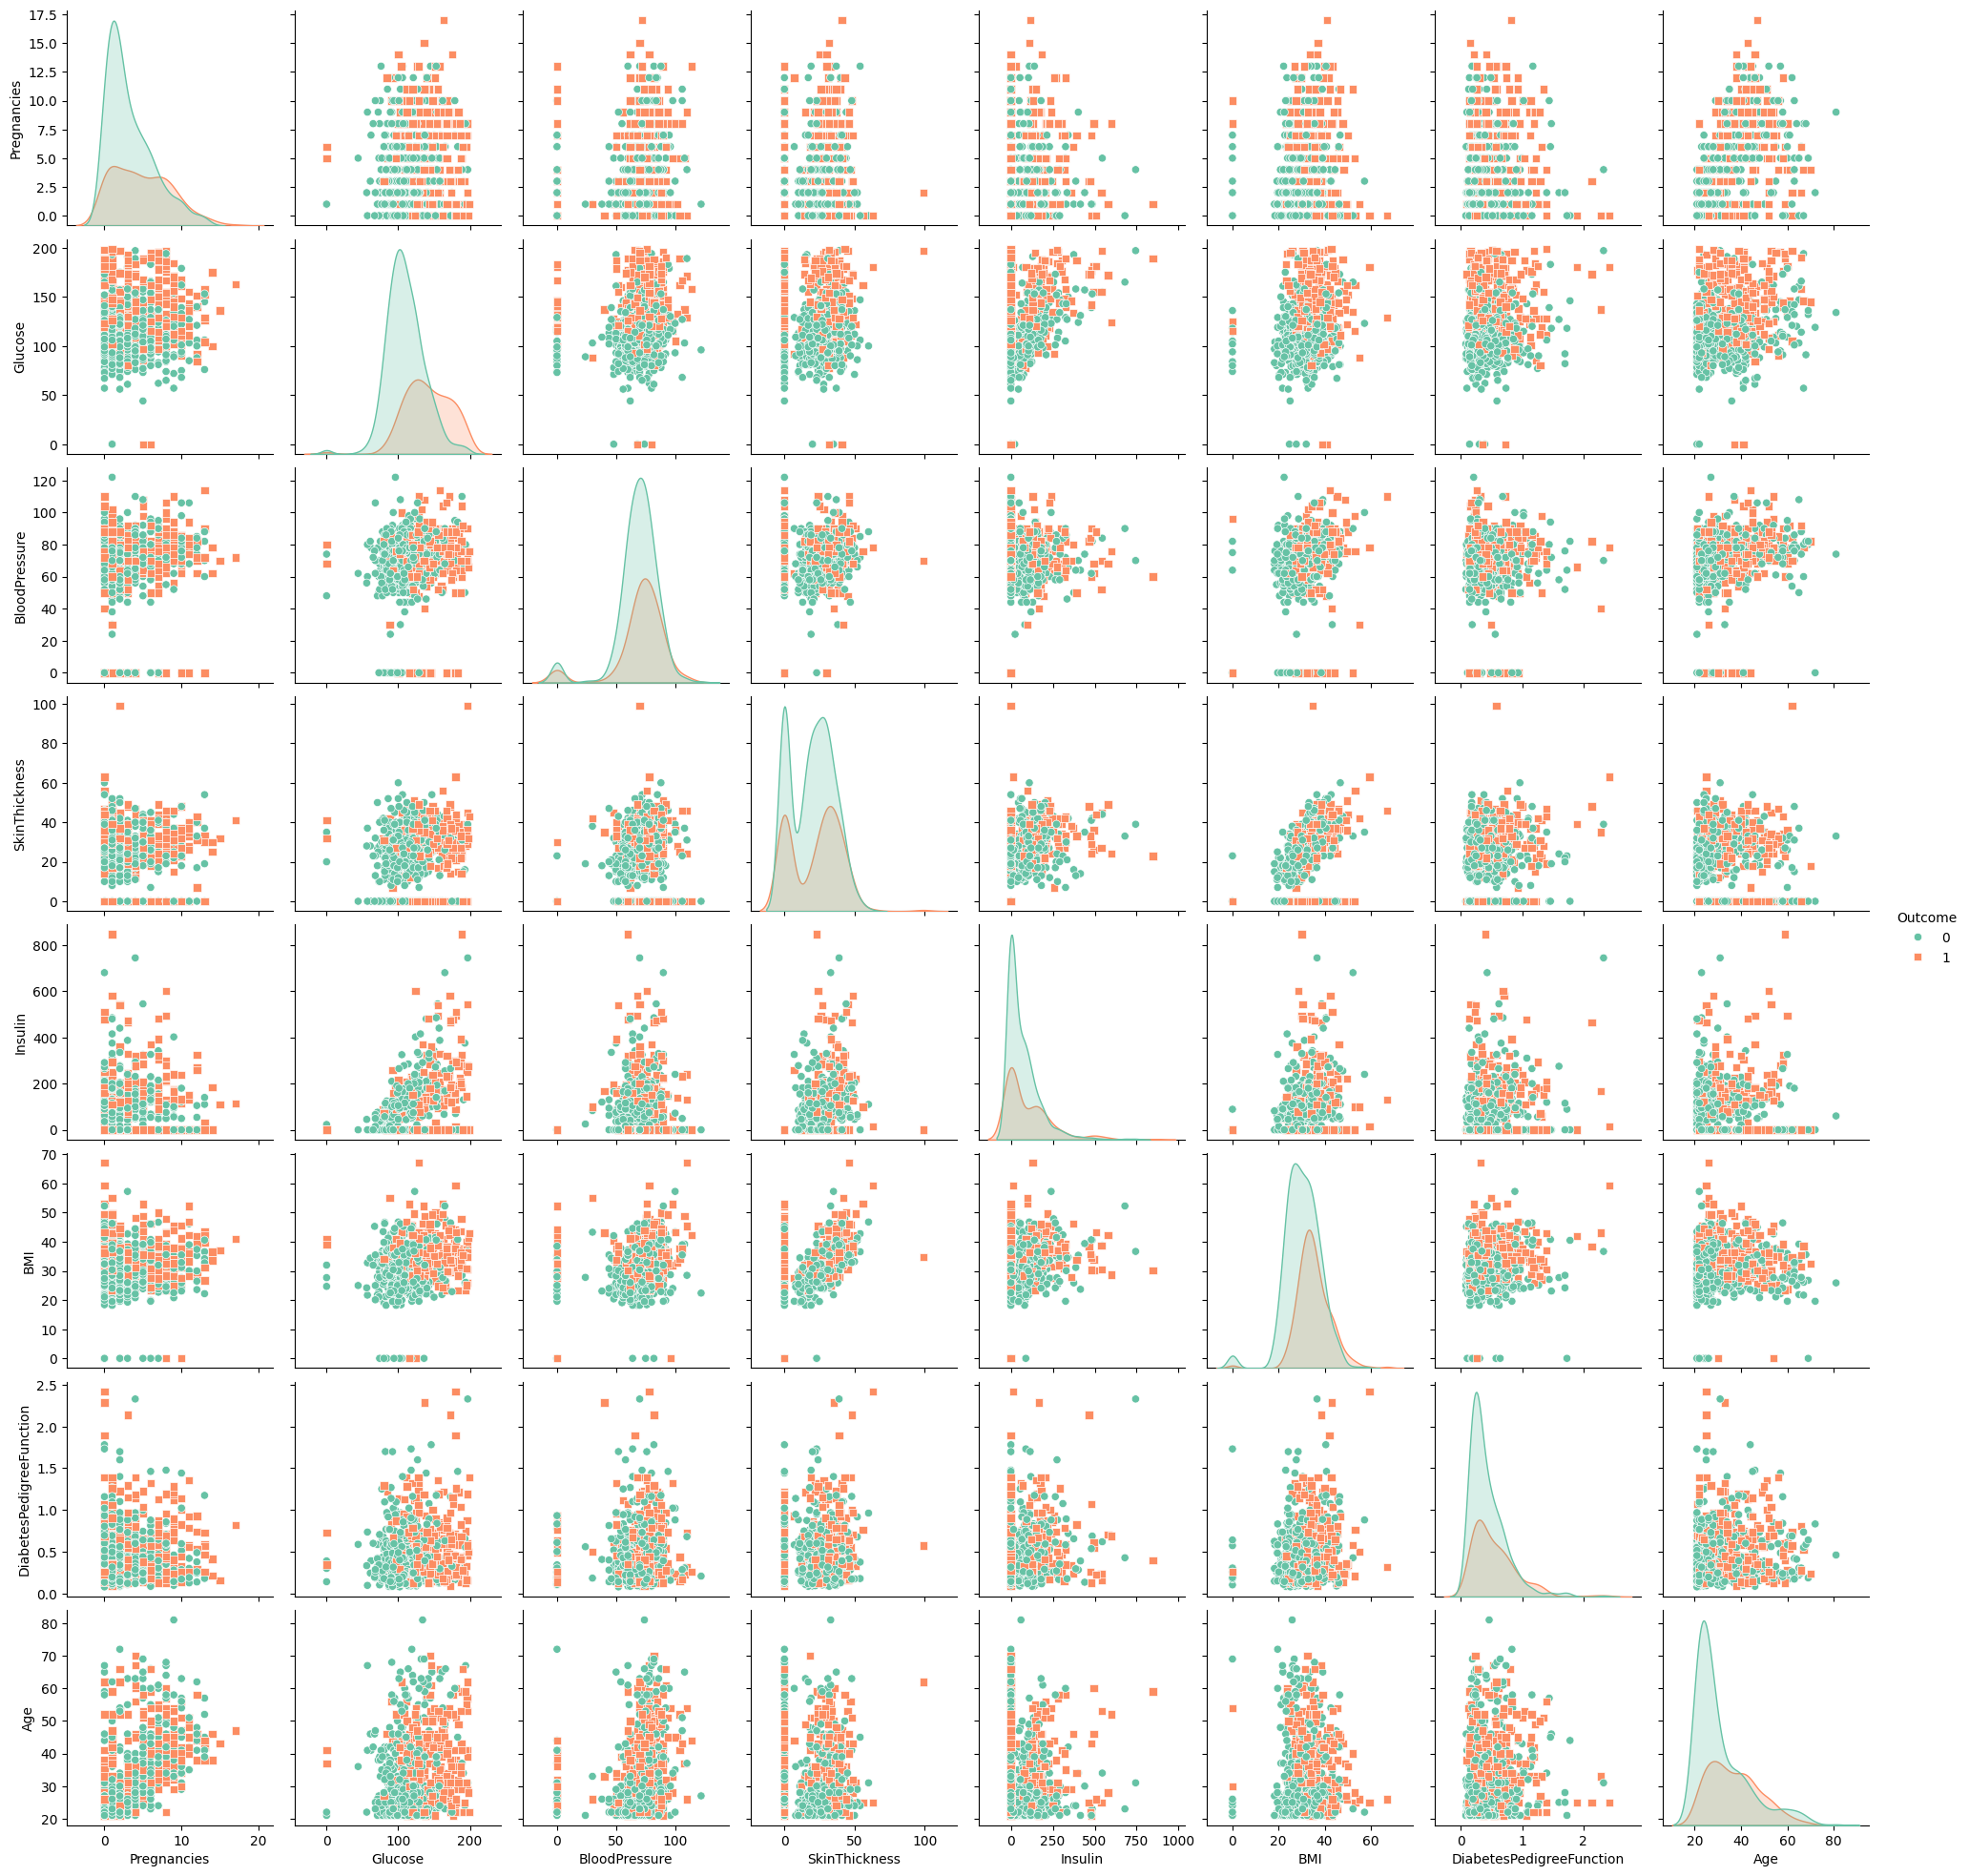

In [ ]:
sns.pairplot(dataset, hue="Outcome", markers=["o", "s"], palette="Set2")#pair plot

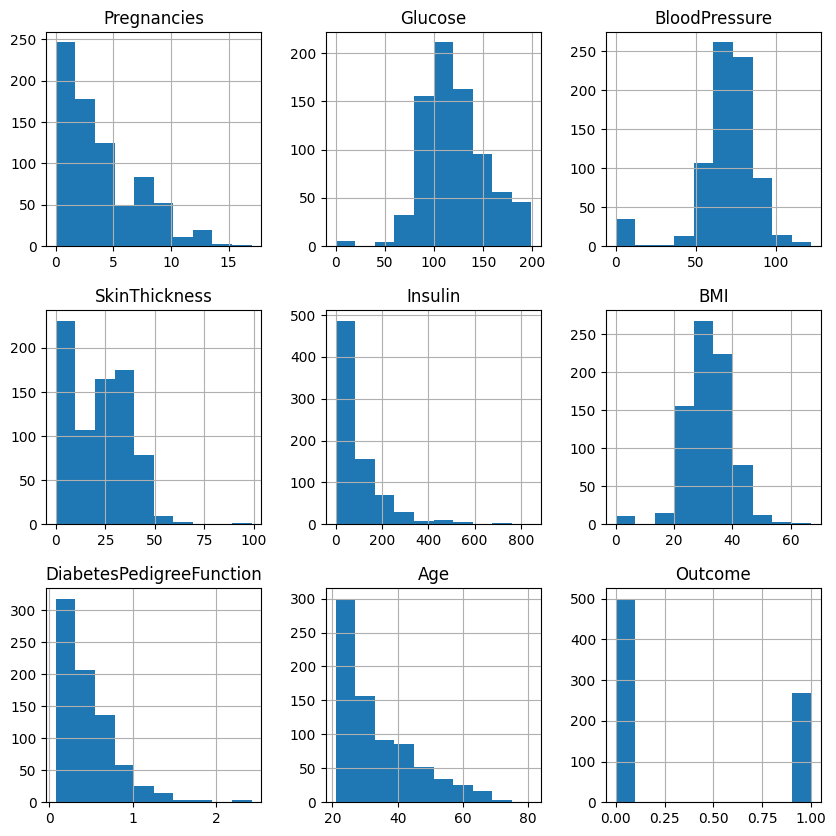

In [ ]:
dataset.hist(figsize = (10,10),bins=10)#histograma
plt.show()

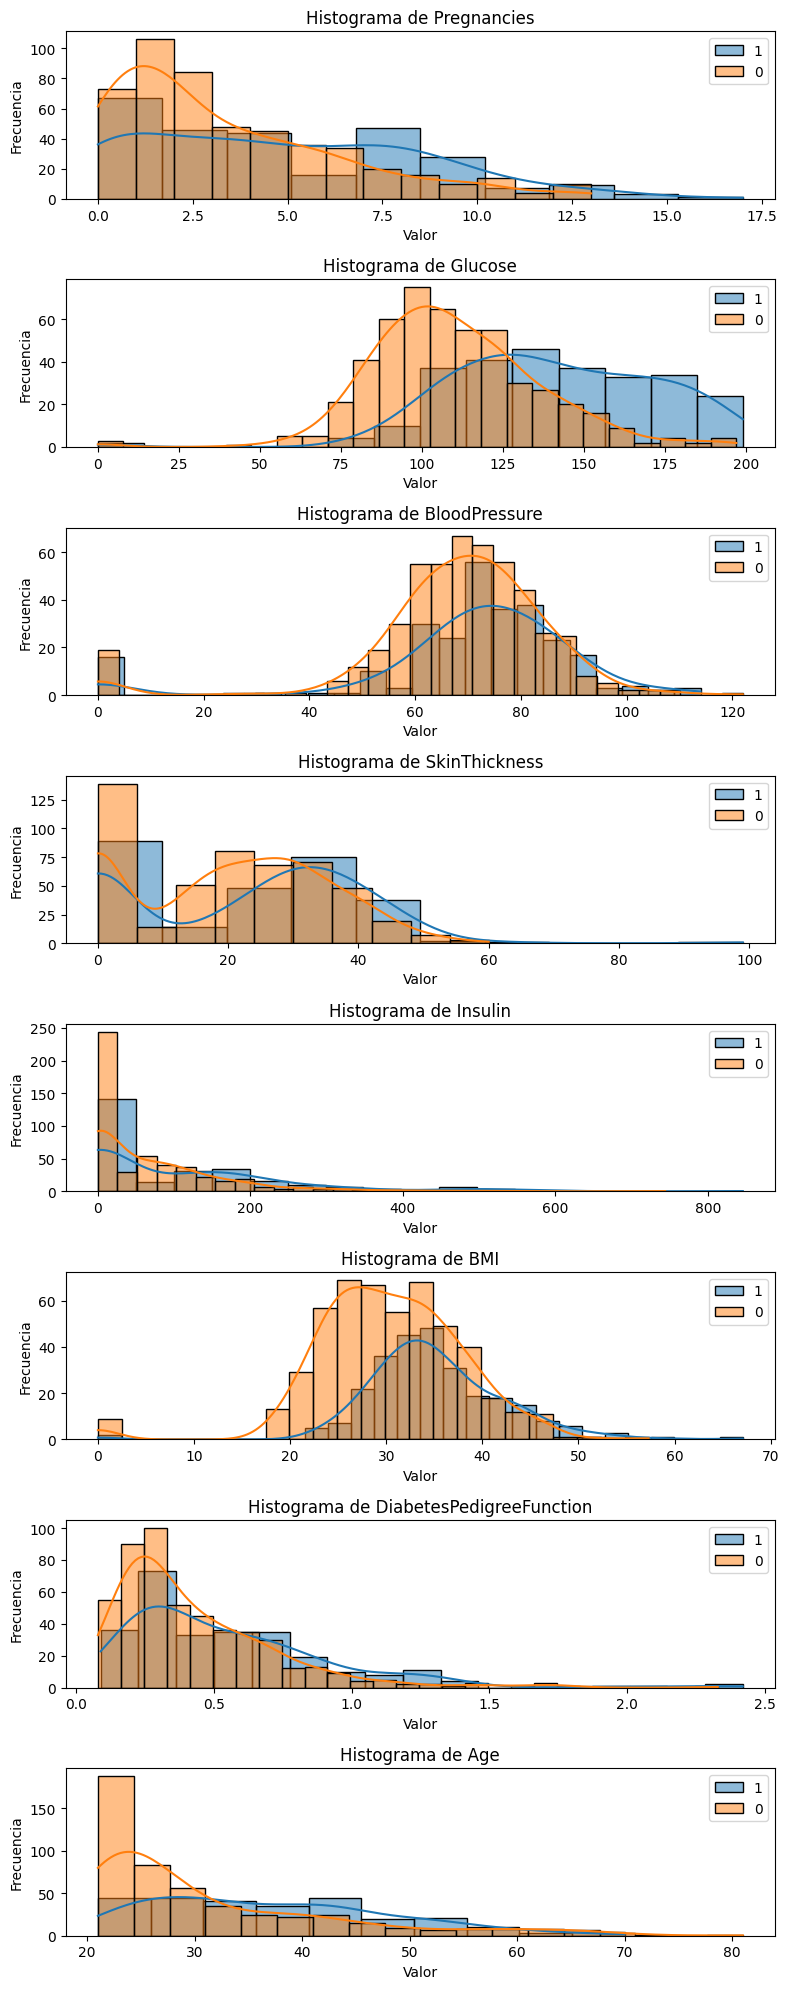

In [ ]:
# Crear las figuras y los subplots
fig, axes = plt.subplots(8, 1, figsize=(8, 20))

# Lista de características y clases
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
classes = dataset['Outcome'].unique()

# Iterar sobre las características y crear histogramas para cada clase
for i, feature in enumerate(features):
    for cls in classes:
        sns.histplot(dataset[dataset['Outcome'] == cls][feature], ax=axes[i], label=cls, kde=True)
    axes[i].set_title(f'Histograma de {feature}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar las figuras
plt.show()

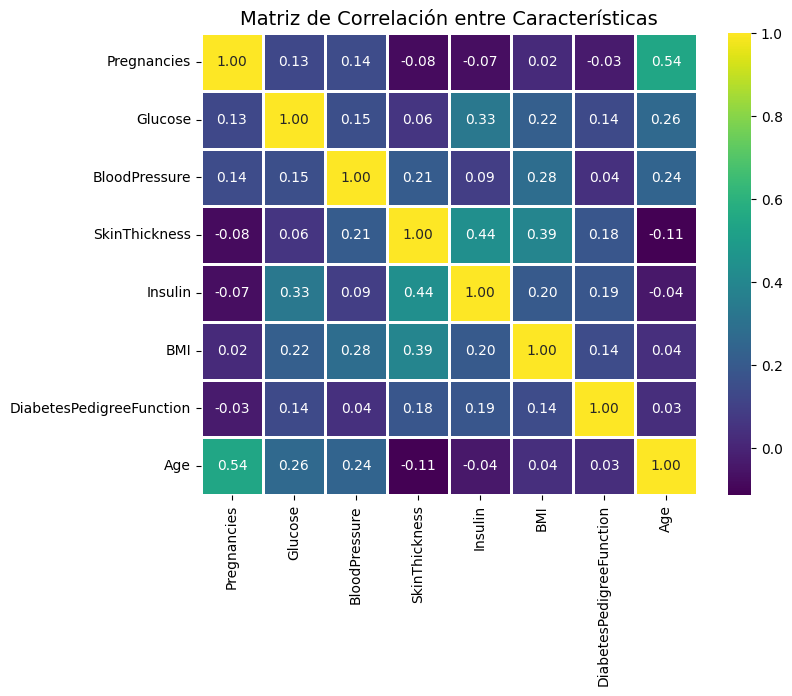

In [2]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
numeric_data = dataset[numeric_cols]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear una figura y un eje (subplot) utilizando seaborn
plt.figure(figsize=(8, 6))

# Cambiar el colormap a 'viridis' (otro colormap fresco)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Añadir título
plt.title('Matriz de Correlación entre Características', fontsize=14)

# Mostrar la matriz de correlación
plt.show()



*  No se detectan relaciones muy fuertes, la principal es entre la edad y los embarazos
*   Tambien se encuentra una relacion entre la insulina y el grosor de la piel

